This notebook shows examples of how AART can be used and how the data is stored and accessed. This notebook takes less than 2 minutes of CPU (2.3 GHz Intel Core i7) time!

Feel free to use this code (**with attribution to Ref. [1]**) for your research or to produce visualizations for your next presentation! 

In [1]:
from aart_func import *
from params import * # The file params.py contains all the relevant parameters for the simulations


Thanks for using AART
Copyright (C) 2022, A. Cardenas-Avendano, H. Zhu & A. Lupsasca

A directory (Results) was created to store the results


# Computation of the lensing bands

In [2]:
%time !python lensingbands.py


Thanks for using AART
Copyright (C) 2022, A. Cardenas-Avendano, H. Zhu & A. Lupsasca

Computing the lensing bands
Number of points in the n=0 grid  6250000
Number of points in the n=1 grid  6250000
Number of points in the n=2 grid  6250000
File  ./Results/LensingBands_a_0.94_i_17.h5  created.
CPU times: user 779 ms, sys: 283 ms, total: 1.06 s
Wall time: 53.4 s


## Reading the output of the lensing bands calculation

In [3]:
fnbands="./Results/LensingBands_a_%s_i_%s.h5"%(spin_case,i_case)

print("Reading file: ",fnbands)

h5f = h5py.File(fnbands,'r')

#Points for the boundary of the BH shadow
alpha_critc=h5f['alpha'][:]
beta_critc=h5f['beta'][:]

#The concave hulls for the lensing bands
hull_0i=h5f['hull_0i'][:]
hull_0e=h5f['hull_0e'][:]
hull_1i=h5f['hull_1i'][:]
hull_1e=h5f['hull_1e'][:]
hull_2i=h5f['hull_2i'][:]
hull_2e=h5f['hull_2e'][:]

#The grid points for each lensing band
supergrid0=h5f['grid0'][:]
N0=int(h5f["N0"][0])
mask0=h5f['mask0'][:]
lim0=int(h5f["lim0"][0])
supergrid1=h5f['grid1'][:]
N1=int(h5f["N1"][0])
mask1=h5f['mask1'][:]
lim1=int(h5f["lim1"][0])
supergrid2=h5f['grid2'][:]
N2=int(h5f["N2"][0])
mask2=h5f['mask2'][:]
lim2=int(h5f["lim2"][0])

h5f.close()

Reading file:  ./Results/LensingBands_a_0.94_i_17.h5


## Plotting the lensing bands

Let us now plot the boundaries of the lensing bands and just the grid points of the n=1 lensing band. 

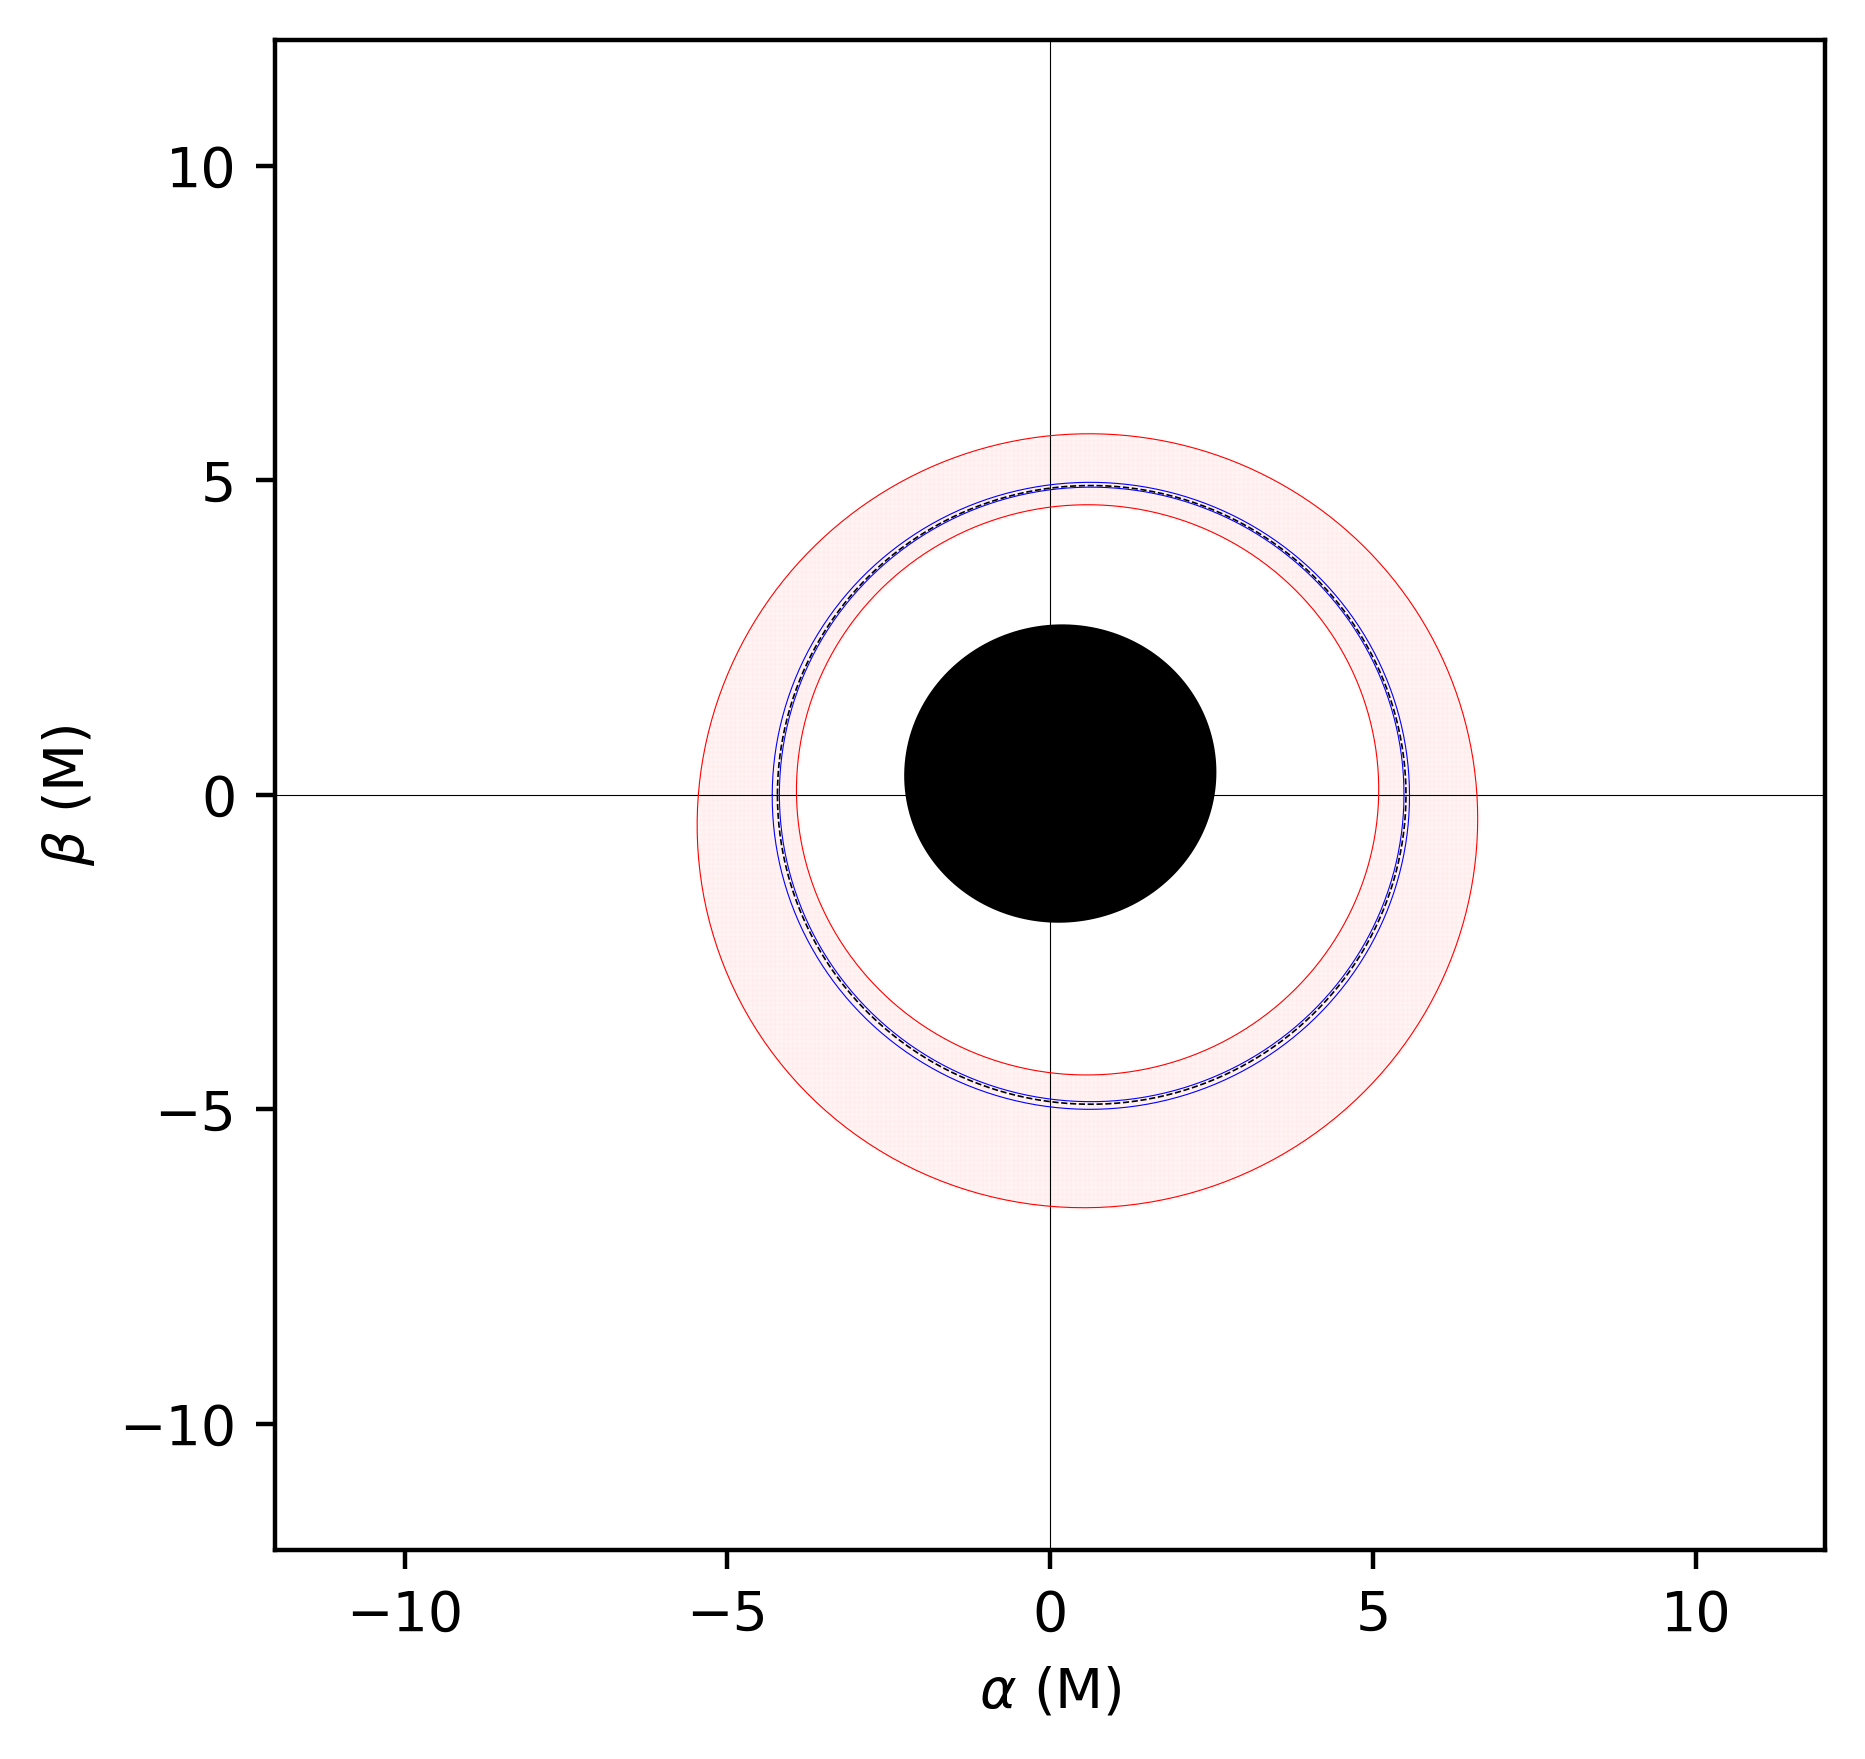

In [4]:
fig, ax = plt.subplots(figsize=[5,5],dpi=400)

ax.axvline(0,color="k",linewidth=0.2)
ax.axhline(0,color="k",linewidth=0.2)

ax.plot(alpha_critc,beta_critc,color="k",linewidth=0.3,linestyle="--")
ax.plot(alpha_critc,-beta_critc,color="k",linewidth=0.3,linestyle="--")

ax.fill(hull_0i[:,0],hull_0i[:,1],color="k")
ax.plot(hull_1i[:,0],hull_1i[:,1],'r',linewidth=0.2)
ax.plot(hull_1e[:,0],hull_1e[:,1],'r',linewidth=0.2)
ax.plot(hull_2i[:,0],hull_2i[:,1],'b',linewidth=0.2)
ax.plot(hull_2e[:,0],hull_2e[:,1],'b',linewidth=0.2)

#Plotting the grid points of the n=1 lensing band
ax.scatter(supergrid1[:,0][mask1],supergrid1[:,1][mask1],color="r",marker=".",s=.00001,alpha=0.5)

ax.set_xlim(-12,12)
ax.set_ylim(-12,12)

ax.set_xlabel(r"$\alpha$"+" "+"(M)")
ax.set_ylabel(r"$\beta$"+" "+"(M)")

plt.show()

# Analytical Ray-tracing

In [5]:
%time !python raytracing.py


Thanks for using AART
Copyright (C) 2022, A. Cardenas-Avendano, H. Zhu & A. Lupsasca

Ray-tracing
Reading file:  ./Results/LensingBands_a_0.94_i_17.h5
Analytical ray-tracing of the n=0 band points
Analytical ray-tracing of the n=1 band points
Analytical ray-tracing of the n=2 band points
File  ./Results/Rays_a_0.94_i_17.h5  created.

A total of 18750000 photons were ray-traced
CPU times: user 1.01 s, sys: 354 ms, total: 1.37 s
Wall time: 1min 13s


### Reading the output of the ray-tracing

In [6]:
fnrays="./Results/Rays_a_%s_i_%s.h5"%(spin_case,i_case)

print("Reading file: ",fnrays)

h5f = h5py.File(fnrays,'r')

rs0=h5f['rs0'][:]
sign0=h5f['sign0'][:]
t0=h5f['t0'][:]
phi0=h5f['phi0'][:]

rs1=h5f['rs1'][:]
sign1=h5f['sign1'][:]
t1=h5f['t1'][:]
phi1=h5f['phi1'][:]

rs2=h5f['rs2'][:]
sign2=h5f['sign2'][:]
t2=h5f['t2'][:]
phi2=h5f['phi2'][:]

h5f.close()

Reading file:  ./Results/Rays_a_0.94_i_17.h5


## Plotting the $r$ and $\phi$ values of the n=0 band

We can now visualize how the coordinates of the direct image look on the observers' screen. We will plot in the background contours of the polar coordinate (every 45 degrees) and make some contours of constant Boyer-Lindquist radius ($r_{\rm s}=3,6,9,12,15,20$). 

/var/folders/ps/r_xgpv5x08xfbl4thn_zff9c0000gn/T/ipykernel_5120/2352819439.py:5: RuntimeWarning: invalid value encountered in remainder
  CSphi=ax.contourf(phi0.reshape(N0,N0).T%(2*np.pi),cmap="Greys",levels=np.linspace(0,2*np.pi,9),extent=[-lim0,lim0,-lim0,lim0],origin="lower")


Text(0, 0.5, '$\\beta$ (M)')

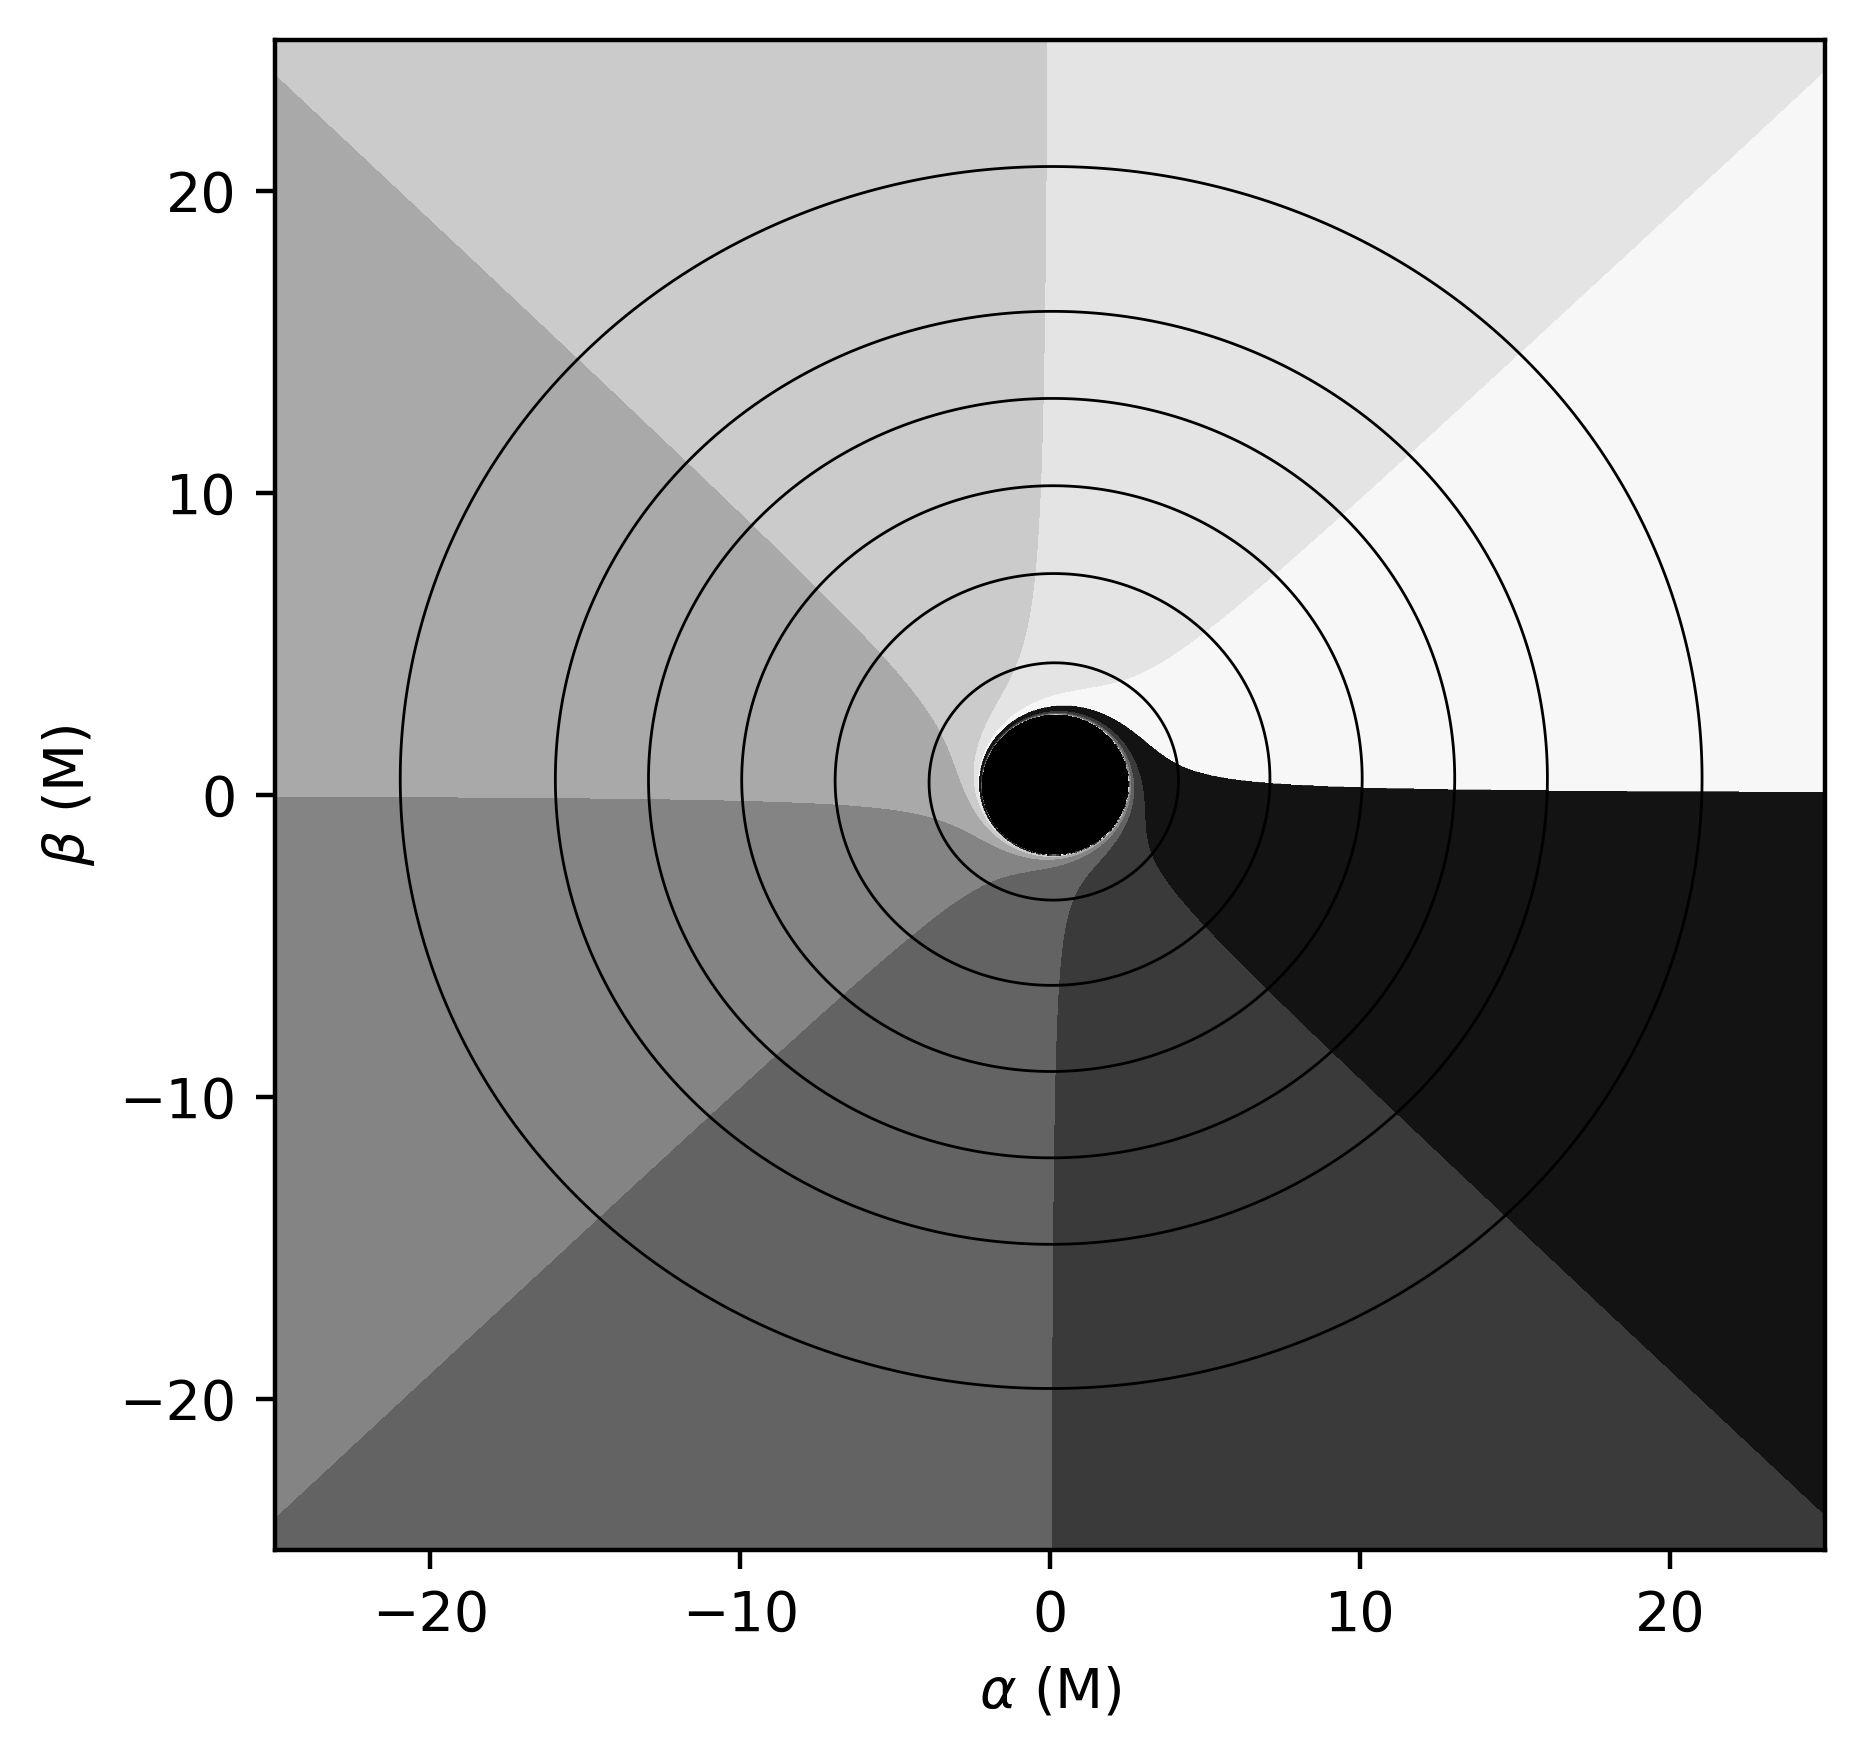

In [7]:
fig, ax = plt.subplots(figsize=[5,5],dpi=400)

ax.fill(hull_0i[:,0],hull_0i[:,1],color="k",linewidth=1,zorder=0)
        
CSphi=ax.contourf(phi0.reshape(N0,N0).T%(2*np.pi),cmap="Greys",levels=np.linspace(0,2*np.pi,9),extent=[-lim0,lim0,-lim0,lim0],origin="lower")
CSr=ax.contour(rs0.reshape(N0,N0).T,levels=[3,6,9,12,15,20],extent=[-lim0,lim0,-lim0,lim0],origin="lower",linewidths=0.5,colors='k')

ax.set_xlim(-lim0,lim0)
ax.set_ylim(-lim0,lim0)

ax.set_xlabel(r"$\alpha$"+" "+"(M)")
ax.set_ylabel(r"$\beta$"+" "+"(M)")


You can also plot the coordinate information of the other lensing bands.

# Computing images

Up to now, everything was purely geometrical, i.e., the calculation just depended on the spin and the inclination of the observer. Now, you can implemement your own illumination profile and compute observables. Whenever you change your astrophysics, you do not have to repeat the above calculations.

In [8]:
%time !python radialintensity.py


Thanks for using AART
Copyright (C) 2022, A. Cardenas-Avendano, H. Zhu & A. Lupsasca

Intensity
Reading file:  ./Results/LensingBands_a_0.94_i_17.h5
Reading file:  ./Results/Rays_a_0.94_i_17.h5
File  ./Results/Intensity_a_0.94_i_17.h5  created.
CPU times: user 76.2 ms, sys: 40.8 ms, total: 117 ms
Wall time: 5.31 s


### Reading the resulting file

In [9]:
fnrays="./Results/Intensity_a_%s_i_%s.h5"%(spin_case,i_case)

print("Reading file: ",fnrays)

h5f = h5py.File(fnrays,'r')

I0=h5f['bghts0'][:]
I1=h5f['bghts1'][:]
I2=h5f['bghts2'][:]

h5f.close()

Reading file:  ./Results/Intensity_a_0.94_i_17.h5


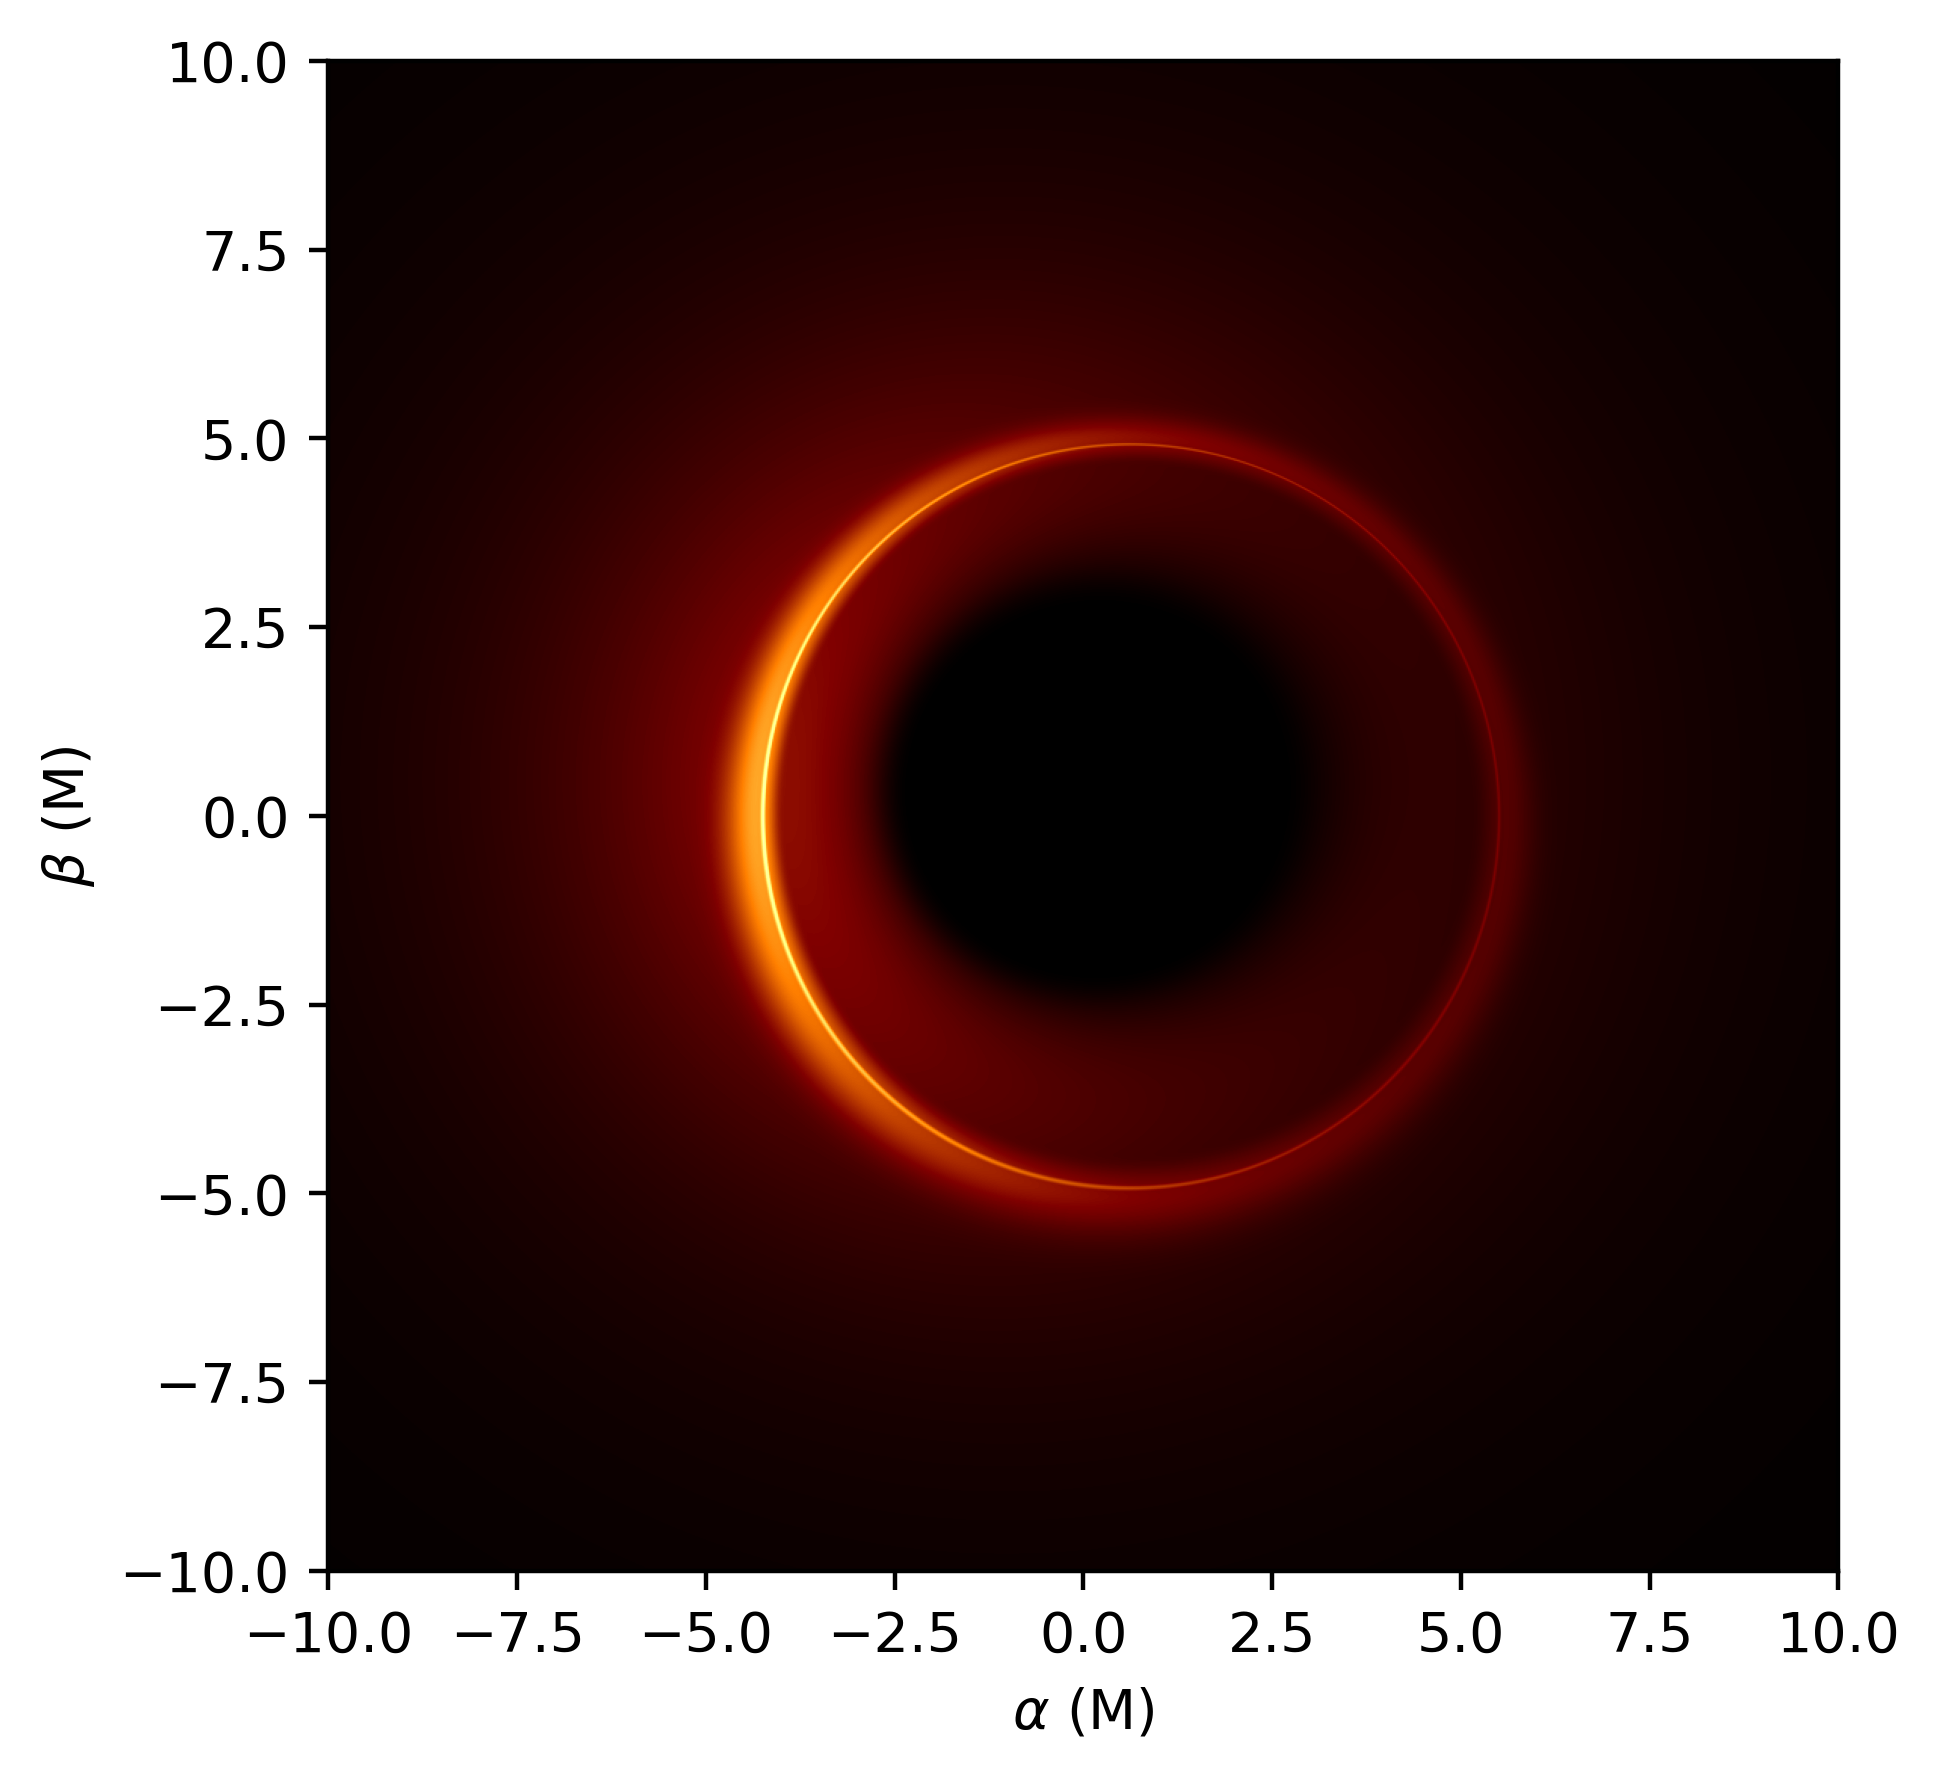

In [10]:
fig, ax = plt.subplots(figsize=[5,5],dpi=400)

ax.imshow(I0+I1+I2,vmax=0.28,origin="lower",cmap="afmhot",extent=[-lim0,lim0,-lim0,lim0])

ax.set_xlim(-10,10)
ax.set_ylim(-10,10)
    
ax.set_xlabel(r"$\alpha$"+" "+"(M)")
ax.set_ylabel(r"$\beta$"+" "+"(M)")

plt.show()

This image looks like a time-averaged GRMHD simulation! 

# Computing the visibility amplitude

Let us now compute the visibility amplitude for two baselines (perpendicular and parallel)

In [11]:
%time !python visamp.py


Thanks for using AART
Copyright (C) 2022, A. Cardenas-Avendano, H. Zhu & A. Lupsasca

Visamp
Reading file:  ./Results/LensingBands_a_0.94_i_17.h5
Reading file:  ./Results/Intensity_a_0.94_i_17.h5
V(0)=  5.2693390565206354e-09
File  ./Results/Visamp_0_a_0.94_i_17_0.h5  created.
V(0)=  5.269339056520636e-09
File  ./Results/Visamp_90_a_0.94_i_17_0.h5  created.
CPU times: user 49.5 ms, sys: 26.5 ms, total: 76 ms
Wall time: 3.43 s


### Reading the resulting file

In [12]:
freqss = []
visamps = []
for i in range(len(radonangles)):
    fnrays="./Results/Visamp_%s_a_%s_i_%s_0.h5"%(radonangles[i],spin_case,i_case)

    print("Reading file: ",fnrays)

    h5f = h5py.File(fnrays,'r')

    freqs=h5f['freqs'][:]
    visamp=h5f['visamp'][:]

    h5f.close()
    freqss.append(freqs)
    visamps.append(visamp)
freqss=np.array(freqss)
visamps=np.array(visamps)

Reading file:  ./Results/Visamp_0_a_0.94_i_17_0.h5
Reading file:  ./Results/Visamp_90_a_0.94_i_17_0.h5


### Plotting the visibility amplitudes

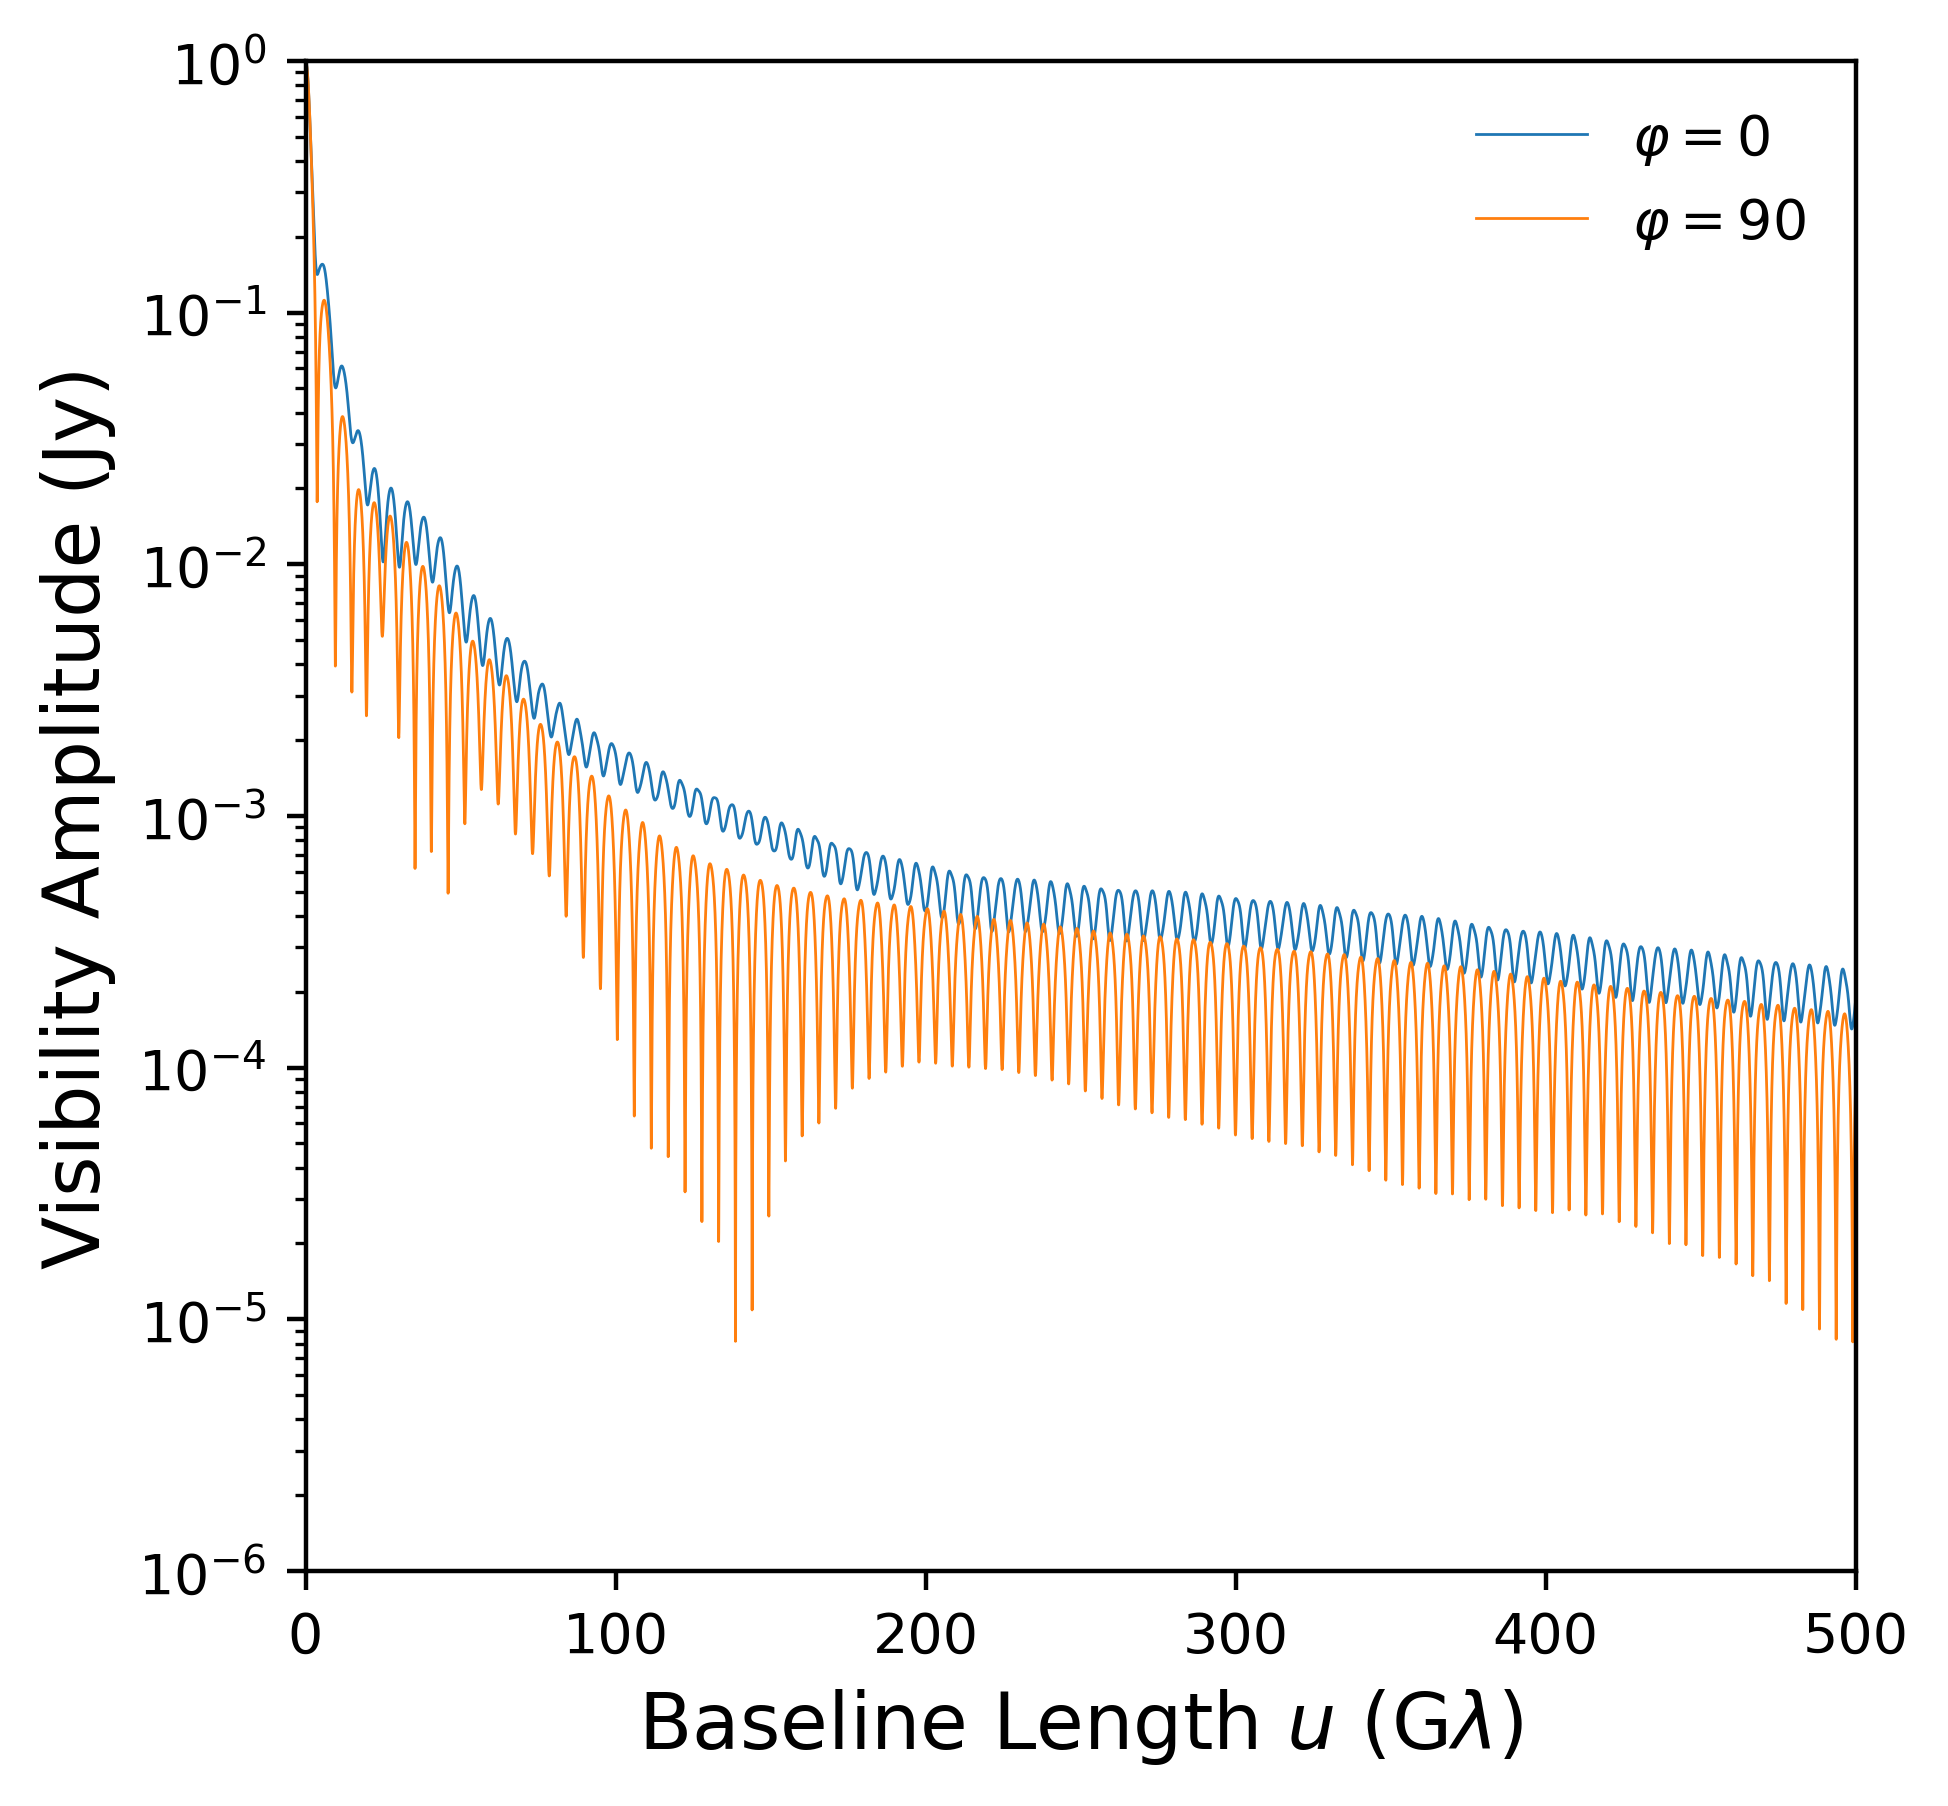

In [13]:
fig, ax = plt.subplots(figsize=[5,5],dpi=400)

for i in range(len(radonangles)):
    ax.plot(freqss[0],visamps[i],linewidth=0.5,label=r"$\varphi=$"+"%s"%radonangles[i])
    
plt.yscale("log")
plt.ylabel("Visibility Amplitude (Jy)",size=14)
plt.xlabel("Baseline Length $u$ (G$\\lambda$)",size=14)
plt.legend(loc="best",frameon=False)
plt.xlim(0.,500.)
plt.ylim(1e-6,1)
plt.show()

Note that for this example we have made the grids to coincide by setting <em> p_image=1</em>. However, it is more efficient to compute each lensing band with different resolutions. So it would be better to restart your kernel and change the resolutions. Something like this will work:

- p_image=0
- limits=25
- dx0 =0.05
- dx1 =0.02
- dx2 =0.01
    
If you do that, you will have to restart your kernel and compute again the lensing bands, rays and the intensities.

# <center>Thanks for using AART!</center>

## License

MIT license

Permission is hereby granted, free of charge, to any person obtaining a copy of this 
software and associated documentation files (the "Software"), to deal in the Software 
without restriction, including without limitation the rights to use, copy, modify, merge, 
publish, distribute, sublicense, and/or sell copies of the Software, and to permit 
persons to whom the Software is furnished to do so, subject to the following conditions:

The above copyright notice and this permission notice shall be included in all copies 
or substantial portions of the Software.

THE SOFTWARE IS PROVIDED "AS IS", WITHOUT WARRANTY OF ANY KIND, EXPRESS OR IMPLIED, 
INCLUDING BUT NOT LIMITED TO THE WARRANTIES OF MERCHANTABILITY, FITNESS FOR A PARTICULAR 
PURPOSE AND NONINFRINGEMENT. IN NO EVENT SHALL THE AUTHORS OR COPYRIGHT HOLDERS BE LIABLE 
FOR ANY CLAIM, DAMAGES OR OTHER LIABILITY, WHETHER IN AN ACTION OF CONTRACT, TORT OR OTHERWISE, 
ARISING FROM, OUT OF OR IN CONNECTION WITH THE SOFTWARE OR THE USE OR OTHER DEALINGS IN 
THE SOFTWARE.